In [29]:
import numpy as np
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload
import pickle
import os
import io
import cv2
import matplotlib.pyplot as plt
import time

folder_id = '1YHxxzZkRyaQpRxwXL3TC6ua0bO838eWa'

json_file = "client_secret_578256736853-u7nte7bgi9iq5fi67vhs1658mkcacc4b.apps.googleusercontent.com.json"
SCOPES = ['https://www.googleapis.com/auth/drive']

token_file = 'token.pickle'
with open(token_file, 'rb') as token:
    credentials = pickle.load(token)
    
drive_service = build('drive', 'v3', credentials=credentials)
download_folder = "/Users/seungtoc/Desktop/bee/server/download/npy"
downloaded_files = set(os.listdir(download_folder))

start download 1008193336.npy


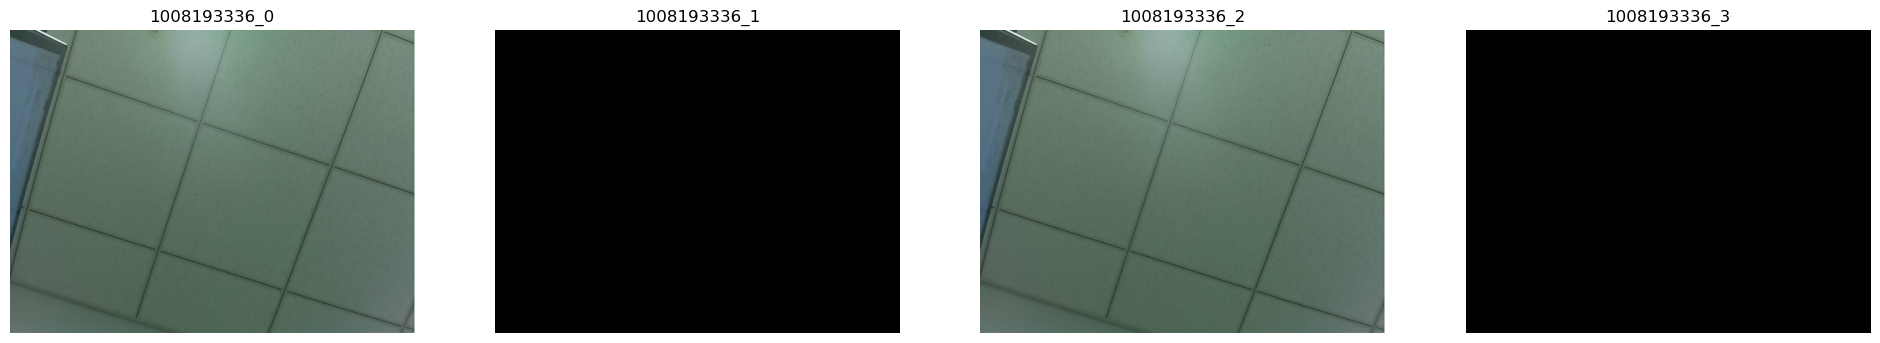

prev_bee, now_bee :  0 0
time sleep
time sleep
time sleep
time sleep
time sleep
time sleep
time sleep
time sleep


KeyboardInterrupt: 

In [30]:
while True:
    # 구글 드라이브에서 모든 파일 목록 가져오기
    results = drive_service.files().list(
        q=f"'{folder_id}' in parents and trashed=false",  # 휴지통에 있는 파일은 제외
        fields="files(id, name, createdTime)",  # 필요한 필드 지정 (createdTime은 업로드 시간)
        orderBy="createdTime desc",  # 업로드된 시간 역순으로 정렬 (가장 최근 업로드 파일부터)
    ).execute()
    files = results.get('files', [])
    
    
    
    for file in files:
        file_id = file['id']
        file_name = file['name']
        
        # 이미 다운로드한 파일인지 확인
        if file_name not in downloaded_files:        
            # npy만 다운로드
            if file_name.endswith('.npy'):
                print("start download", file_name)
                # 파일 다운로드
                request = drive_service.files().get_media(fileId=file_id)
                io_bytes = io.BytesIO()
                downloader = MediaIoBaseDownload(io_bytes, request)
                done = False
            
                
                while done is False:
                    status, done = downloader.next_chunk()

                # BytesIO에서 NumPy 배열로 로드
                io_bytes.seek(0)
                image_data = np.load(io_bytes, allow_pickle=True)

                # 배열을 리스트로 변환
                image_list = image_data.tolist()             
                
                fig, axes = plt.subplots(1, 4, figsize=(24, 6))
                for i  in range(4):
                    image = np.array(image_list[i], dtype=np.uint8)
                    
                    file_path = f"/Users/seungtoc/Desktop/bee/server/download/image/{file_name[:-4]}_{i}.jpg"
                    cv2.imwrite(file_path, image)
                    
                    
                    axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                    axes[i].set_title(f"{file_name[:-4]}_{i}")
                    axes[i].axis('off')
                
            
                plt.show()
                
                print("prev_bee, now_bee : ", int(image_list[4]), int(image_list[5]))
                
                
                with open('/Users/seungtoc/Desktop/bee/server/download/data.txt', 'a') as file:
                    file.write(f'{file_name[:-4]}_prev_bee: {int(image_list[4])}\n')
                    file.write(f'{file_name[:-4]}_now_bee: {int(image_list[5])}\n')
                
            

                # 파일을 다운로드한 후에는 파일 이름을 저장하여 중복 다운로드를 방지
                with open(os.path.join(download_folder, file_name), 'wb') as file_obj:
                    file_obj.write(io_bytes.read())

                downloaded_files.add(file_name)
        
        else:
            print("time sleep")
            time.sleep(5)
            break
        